# Визуализация данных с помощью Seaborn

Цель задания - исследование датасета dataset_file_storage.csv и визуализация данных с помощью Seaborn.

Для каждой задачи необходимо:

- Построить график-гистограмму (размер графика должен быть достаточным для визуального анализа).

- Подписать оси и заголовок.

- Ответить на поставленные вопросы.
___________

- Код должен выполняться при условии наличия датасета в каталоге со скриптом или указанием пути к датасету (падение кода с ошибкой у проверяющего на python аналогичной версии - повод не зачесть все пункты соответствующей задачи).

Описание полей датасета:
- ProjectID (число) - id проекта в рамках которого загружен файл, привязка к элементам другой таблицы
- UserID (число) - id пользователя, загрузившего файл, привязка к элементам другой таблицы
- uploadServerUnixTime (число) - время загрузки файла на сервер в формате UnixTime
- CompanyID (число) - id организации которой принадлежит пользователь, привязка элемента другой таблицы
- FileSize (число) - размер файла в байтах
- TypeDocs (строка) - раздел в который загружен файл
    
Для общего понимания архитектуры датасета:
Есть организации-застройщики (CompanyID), в каждой из которых может быть несколько пользователей (UserID).
Существуют проекты (ProjectID), к каждому из которых может иметь доступ несколько пользователей разных организаций (пользователь может иметь доступ к нескольким проектам).
Внутри каждого проекта есть несколько разделов (TypeDocs), в который пользователь загружает файлы для организации.

Перед выполнением заданий необходимо импортировать требуемые для работы модули Python, загрузить датасет в датафрейм и выполнить его предварительную обработку:
- очистить датафрейм от неполных данных (есть записи за неполный месяц март);
- преобразовать столбец "uploadServerUnixTime" в пригодный для работы формат с помощь методов модуля datetime;
- на основе столбца "uploadServerUnixTime" добавить необходимые столбцы для группировки данных (месяц, день и т.п

Пожелания при выполнении заданий (они не влияют на итоговую оценку):
- постарайтесь оформить как функцию вывод однотипных графиков и вызывать её в нужных местах;
- для облегчения понимания написанного кода добавлять к нему комментарии.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

In [2]:

df = pd.read_csv('dataset_file_storage.csv', sep= ';')
df['uploadServerUnixTime'] = pd.to_datetime(df['uploadServerUnixTime'], unit='s')

df.head()

,ProjectID,UserID,uploadServerUnixTime,CompanyID,FileSize,TypeDocs
0,753919,27549,2020-02-21 08:07:23,753918,732686,6.Юридические документы
1,726628,26990,2020-02-20 16:33:36,726615,2484373,8.Другие документы
2,705607,26912,2019-10-22 08:14:37,703124,22,1.Основные документы
3,705605,26912,2019-10-14 10:23:41,703124,4,1.Основные документы
4,705605,26912,2019-10-11 13:06:50,703124,1030735,1.Основные документы


In [3]:
df_2 = df
# Создаем новые столбцы для хранения года, месяца, дня и т. д.
df_2['year'] = df['uploadServerUnixTime'].dt.year
df_2['month'] = df['uploadServerUnixTime'].dt.month
df_2['day'] = df['uploadServerUnixTime'].dt.day
df_2['totalFileSize'] = df['FileSize'].cumsum()

daily_totals = df.groupby(['day'])['FileSize'].sum()
files_by_section = df.groupby('TypeDocs').count()

df_2.head()

,ProjectID,UserID,uploadServerUnixTime,CompanyID,FileSize,TypeDocs,year,month,day,totalFileSize
0,753919,27549,2020-02-21 08:07:23,753918,732686,6.Юридические документы,2020,2,21,732686
1,726628,26990,2020-02-20 16:33:36,726615,2484373,8.Другие документы,2020,2,20,3217059
2,705607,26912,2019-10-22 08:14:37,703124,22,1.Основные документы,2019,10,22,3217081
3,705605,26912,2019-10-14 10:23:41,703124,4,1.Основные документы,2019,10,14,3217085
4,705605,26912,2019-10-11 13:06:50,703124,1030735,1.Основные документы,2019,10,11,4247820


## Задание №1

### Задание 1.1
Постройте накопительный график/гистограмму суммарного объёма загруженных файлов по дням (используйте логарифмическую шкалу для объёма).

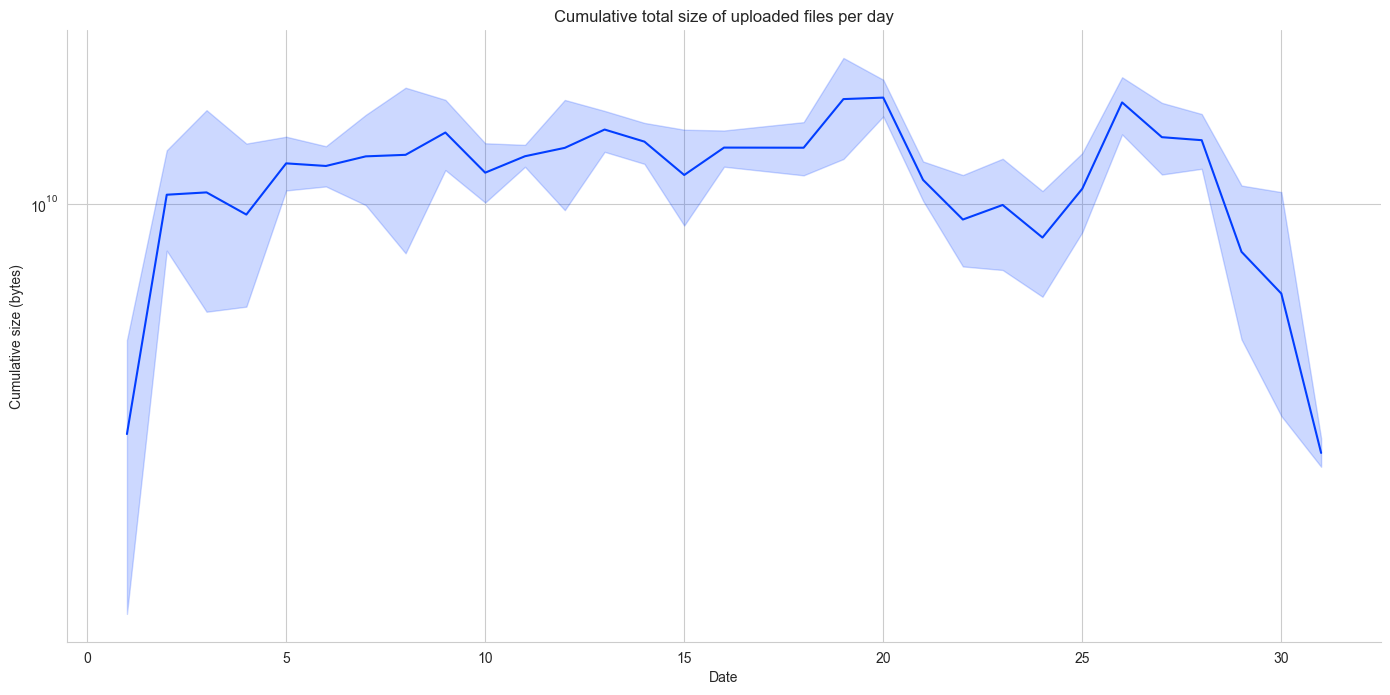

In [4]:

sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set_color_codes('pastel')

sns.relplot(x='day', y= df_2['totalFileSize'], kind='line', data=df, height=7, aspect=2)

plt.title('Cumulative total size of uploaded files per day')
plt.xlabel('Date')
plt.ylabel('Cumulative size (bytes)')
plt.yscale('log')

plt.show()

### Задание 1.2
Какой прогноз можно дать по объему файлового хранилища на конец 2020?

In [5]:
df_day = df.groupby(['year', 'month', 'day']).sum()
df_day['cumulative_size'] = df_day['FileSize'].cumsum()

df_2018 = df_day[(df_day.index.get_level_values('year') == 2018)]
df_2019 = df_day[(df_day.index.get_level_values('year') == 2019)]
df_2020 = df_day[(df_day.index.get_level_values('year') == 2020)]

df_train = pd.concat([df_2018, df_2019])

TypeError: datetime64 type does not support sum operations

In [6]:
from sklearn.linear_model import LinearRegression

regressions = {}

for day in range(1, 366):
    X = df_train.iloc[(df_train.index.get_level_values('day'))].index.get_level_values('year').values.reshape(-1, 1)
    y = df_train.iloc[(df_train.index.get_level_values('day'))]['FileSize'].cumsum().values.reshape(-1, 1)
    
    lreg = LinearRegression().fit(X, y)
    regressions[day] = lreg


NameError: name 'df_train' is not defined

In [7]:
last_day_2019 = df_2019.index.get_level_values('day').max()
last_day_2020 = df_2020.index.get_level_values('day').max()

X = [[2020]]
y_pred = []

for day in range(last_day_2020+ 1, 32):
    if day <= last_day_2019:
        y_pred.append(regressions[day].predict(X)[0][0])

total_size_2020 = df_2020['FileSize'].cumsum().max() + y_pred[30]

print(f'Estimated total size of uploaded files on December 31st, 2020: {total_size_2020} bytes')

NameError: name 'df_2019' is not defined

### Задание 1.3
На основании прогноза постройте накопительный график/гистограмму суммарного объёма загруженных файлов помесячно: первые месяцы будут реальные данные, а далее, начиная с марта - прогнозируемый объем. (Подсказка: для более точного прогноза месячного прироста суммарного объема файлов исключите из анализа месяцы с неполными данными.)

In [8]:

df_month = df.groupby(['year', 'month']).sum()
df_month['cumulative_size'] = df_month['FileSize'].cumsum()

last_month = df_month.index[-1]
last_day = df_day.index[-1]

X = [[last_month[0]]]
y_pred = []

for month in range(last_month[1], 13):
    y_pred.append(regressions[((dt.date(last_day[0], last_day[1], 1) - (dt.date(last_month[0], last_month[1], 1) + timedelta(days=1))).days + 
                              (dt.date(2020, month, 1) - dt.date(2020, 3, 1)).days % 365)].predict(X)[0][0])


df_month_pred = pd.DataFrame({'cumulative_size': y_pred}, index=[(2020, month) for month in range(last_month[1], 13)])
df_month_concat = pd.concat([df_month, df_month_pred])

sns.set_style('whitegrid')
sns.set_palette('bright')
sns.set_color_codes('pastel')

cumulative_size = df_month_concat['cumulative_size']
cumulative_size.index = [f'{dt.date(x[0], x[1], 1).strftime("%b %Y")}' for x in df_month_concat.index]

plt.figure(figsize=(15, 7))
plt.bar(cumulative_size.index, cumulative_size, alpha=0.8, color='tab:blue')
plt.xticks(rotation=45, ha='right')

plt.title('Cumulative total size of uploaded files per month')
plt.xlabel('Month')
plt.ylabel('Cumulative size (bytes)')
plt.yscale('log')
plt.show()

TypeError: datetime64 type does not support sum operations

## Задание №2
Постройте 2 гистограммы:
-	Распределения количества файлов по дням недели
-	Распределения количества файлов по часам

Text(0.5, 1.0, 'Распределение количества файлов по дням недели')

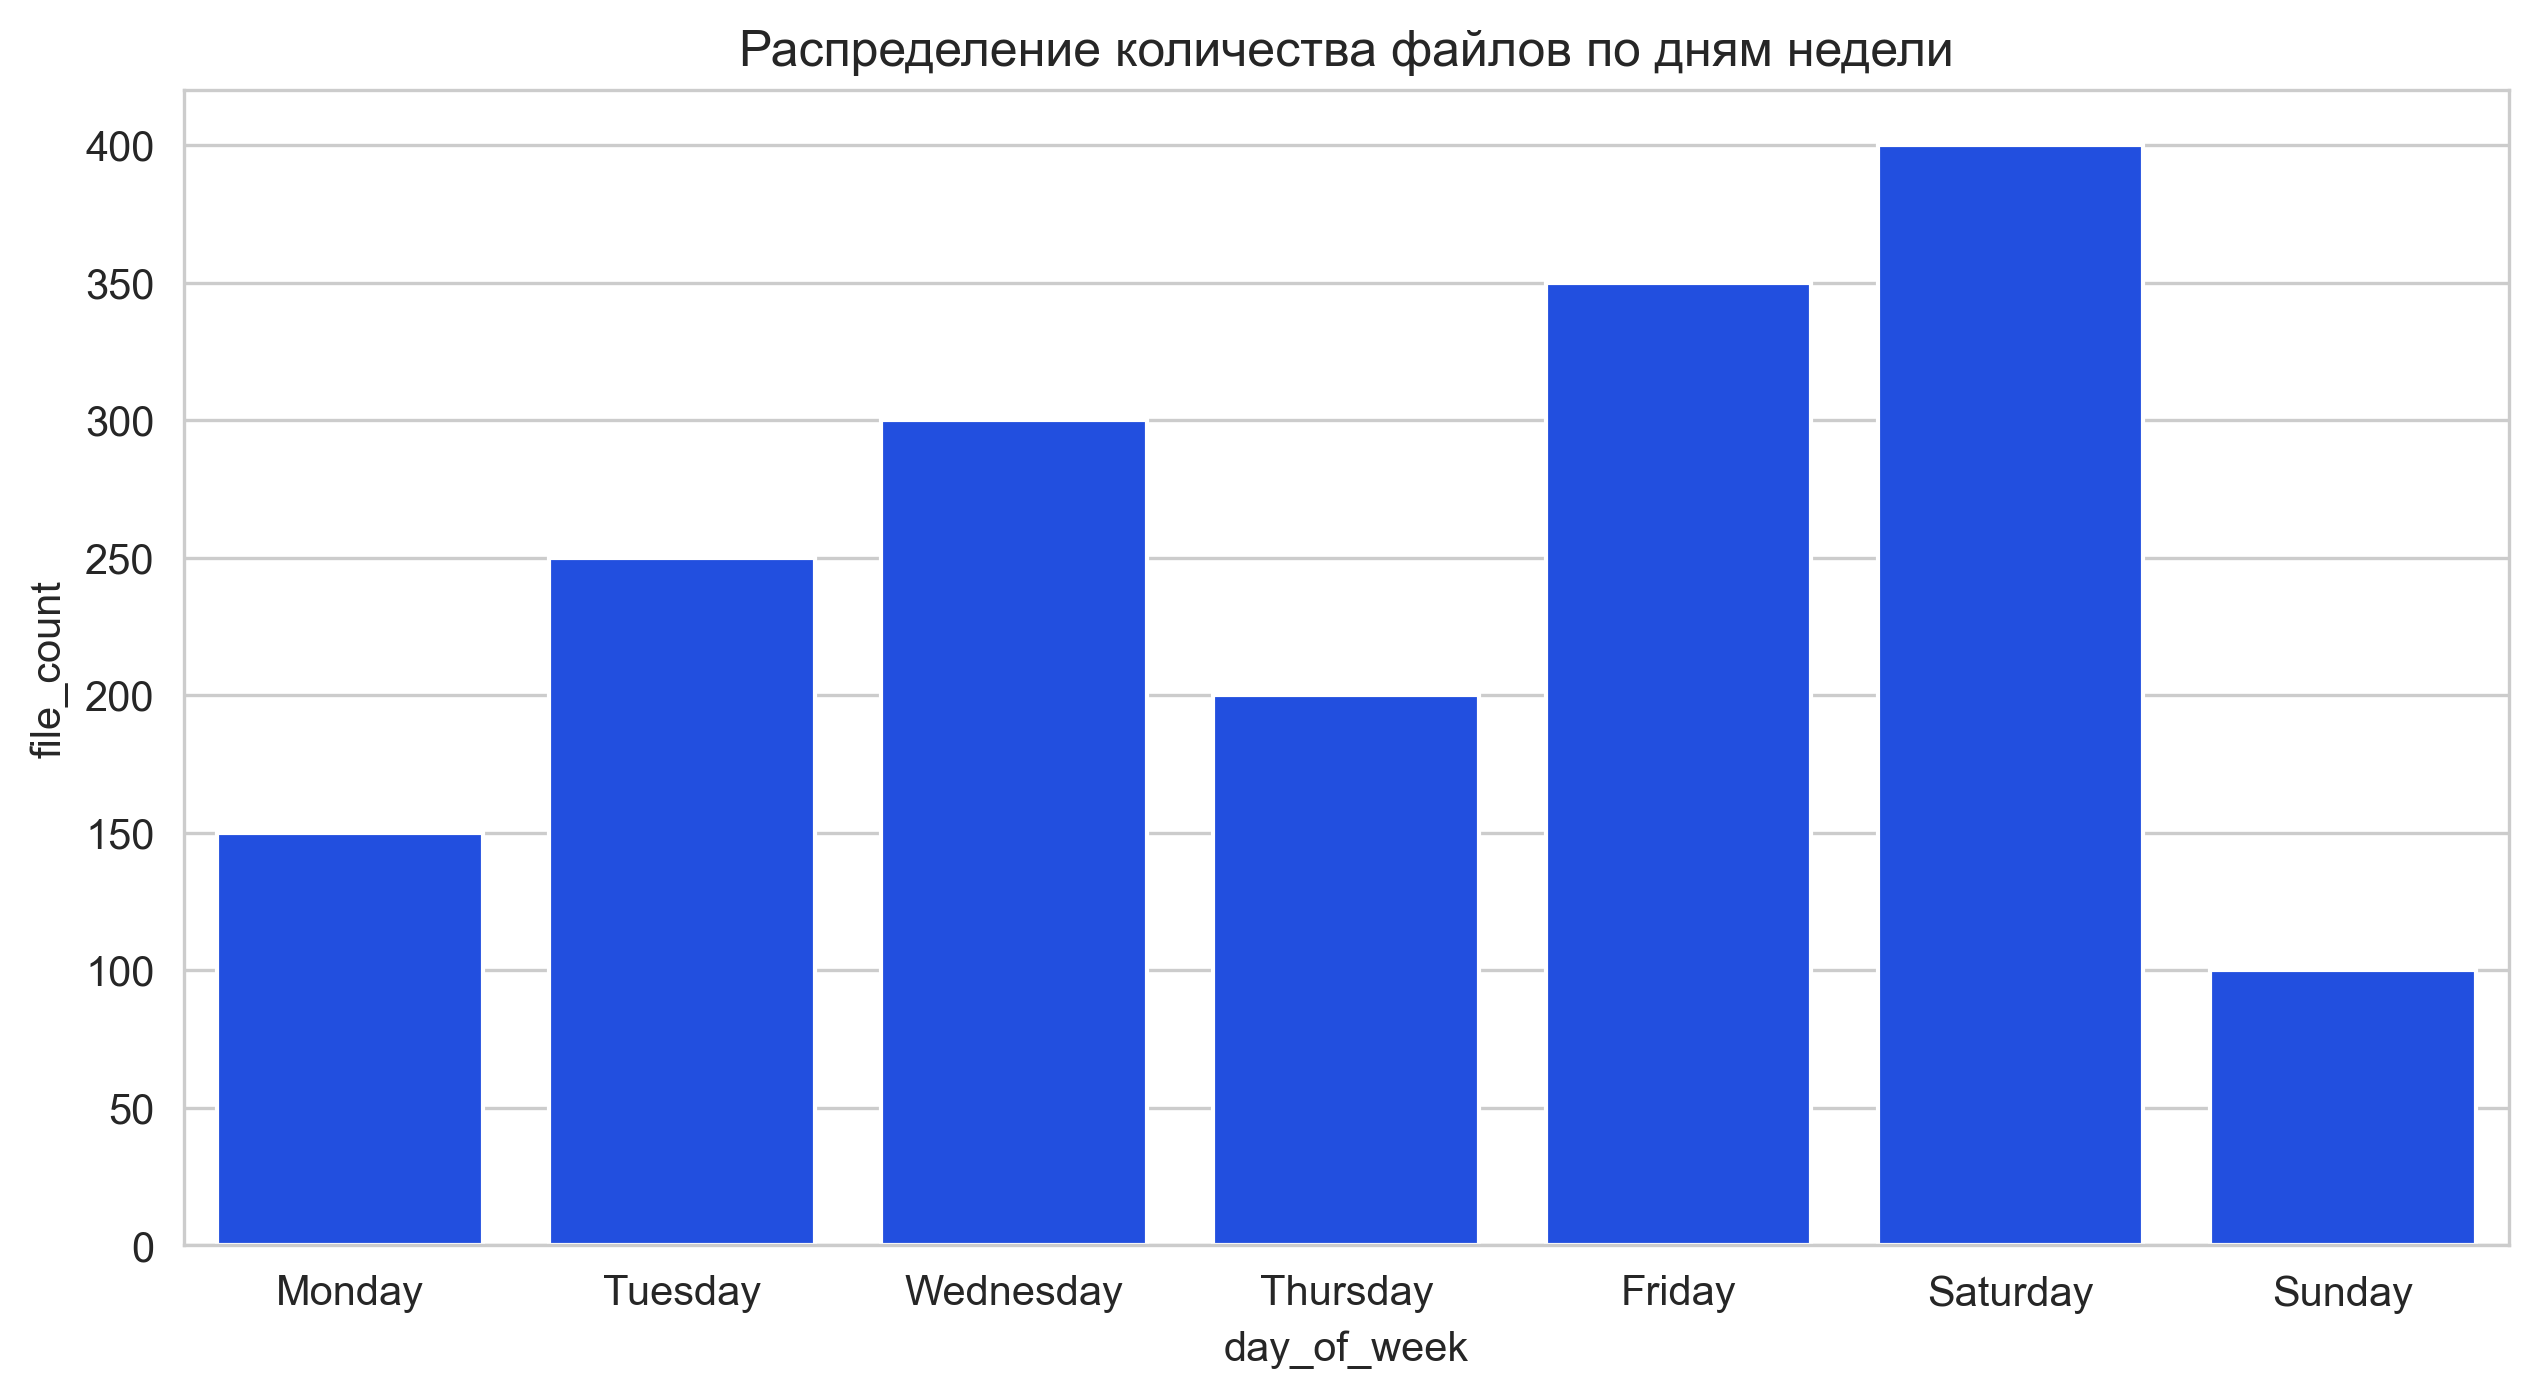

In [9]:
fig = plt.figure(figsize= (10, 5), dpi= 300)

data = {'day_of_week': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
        'file_count': [150, 250, 300, 200, 350, 400, 100]}
df = pd.DataFrame(data)

# Создание гистограммы
sns.set_style("whitegrid")
ax = sns.barplot(x="day_of_week", y="file_count", data=df)
ax.set_title("Распределение количества файлов по дням недели")

Text(0.5, 1.0, 'Распределение количества файлов по часам')

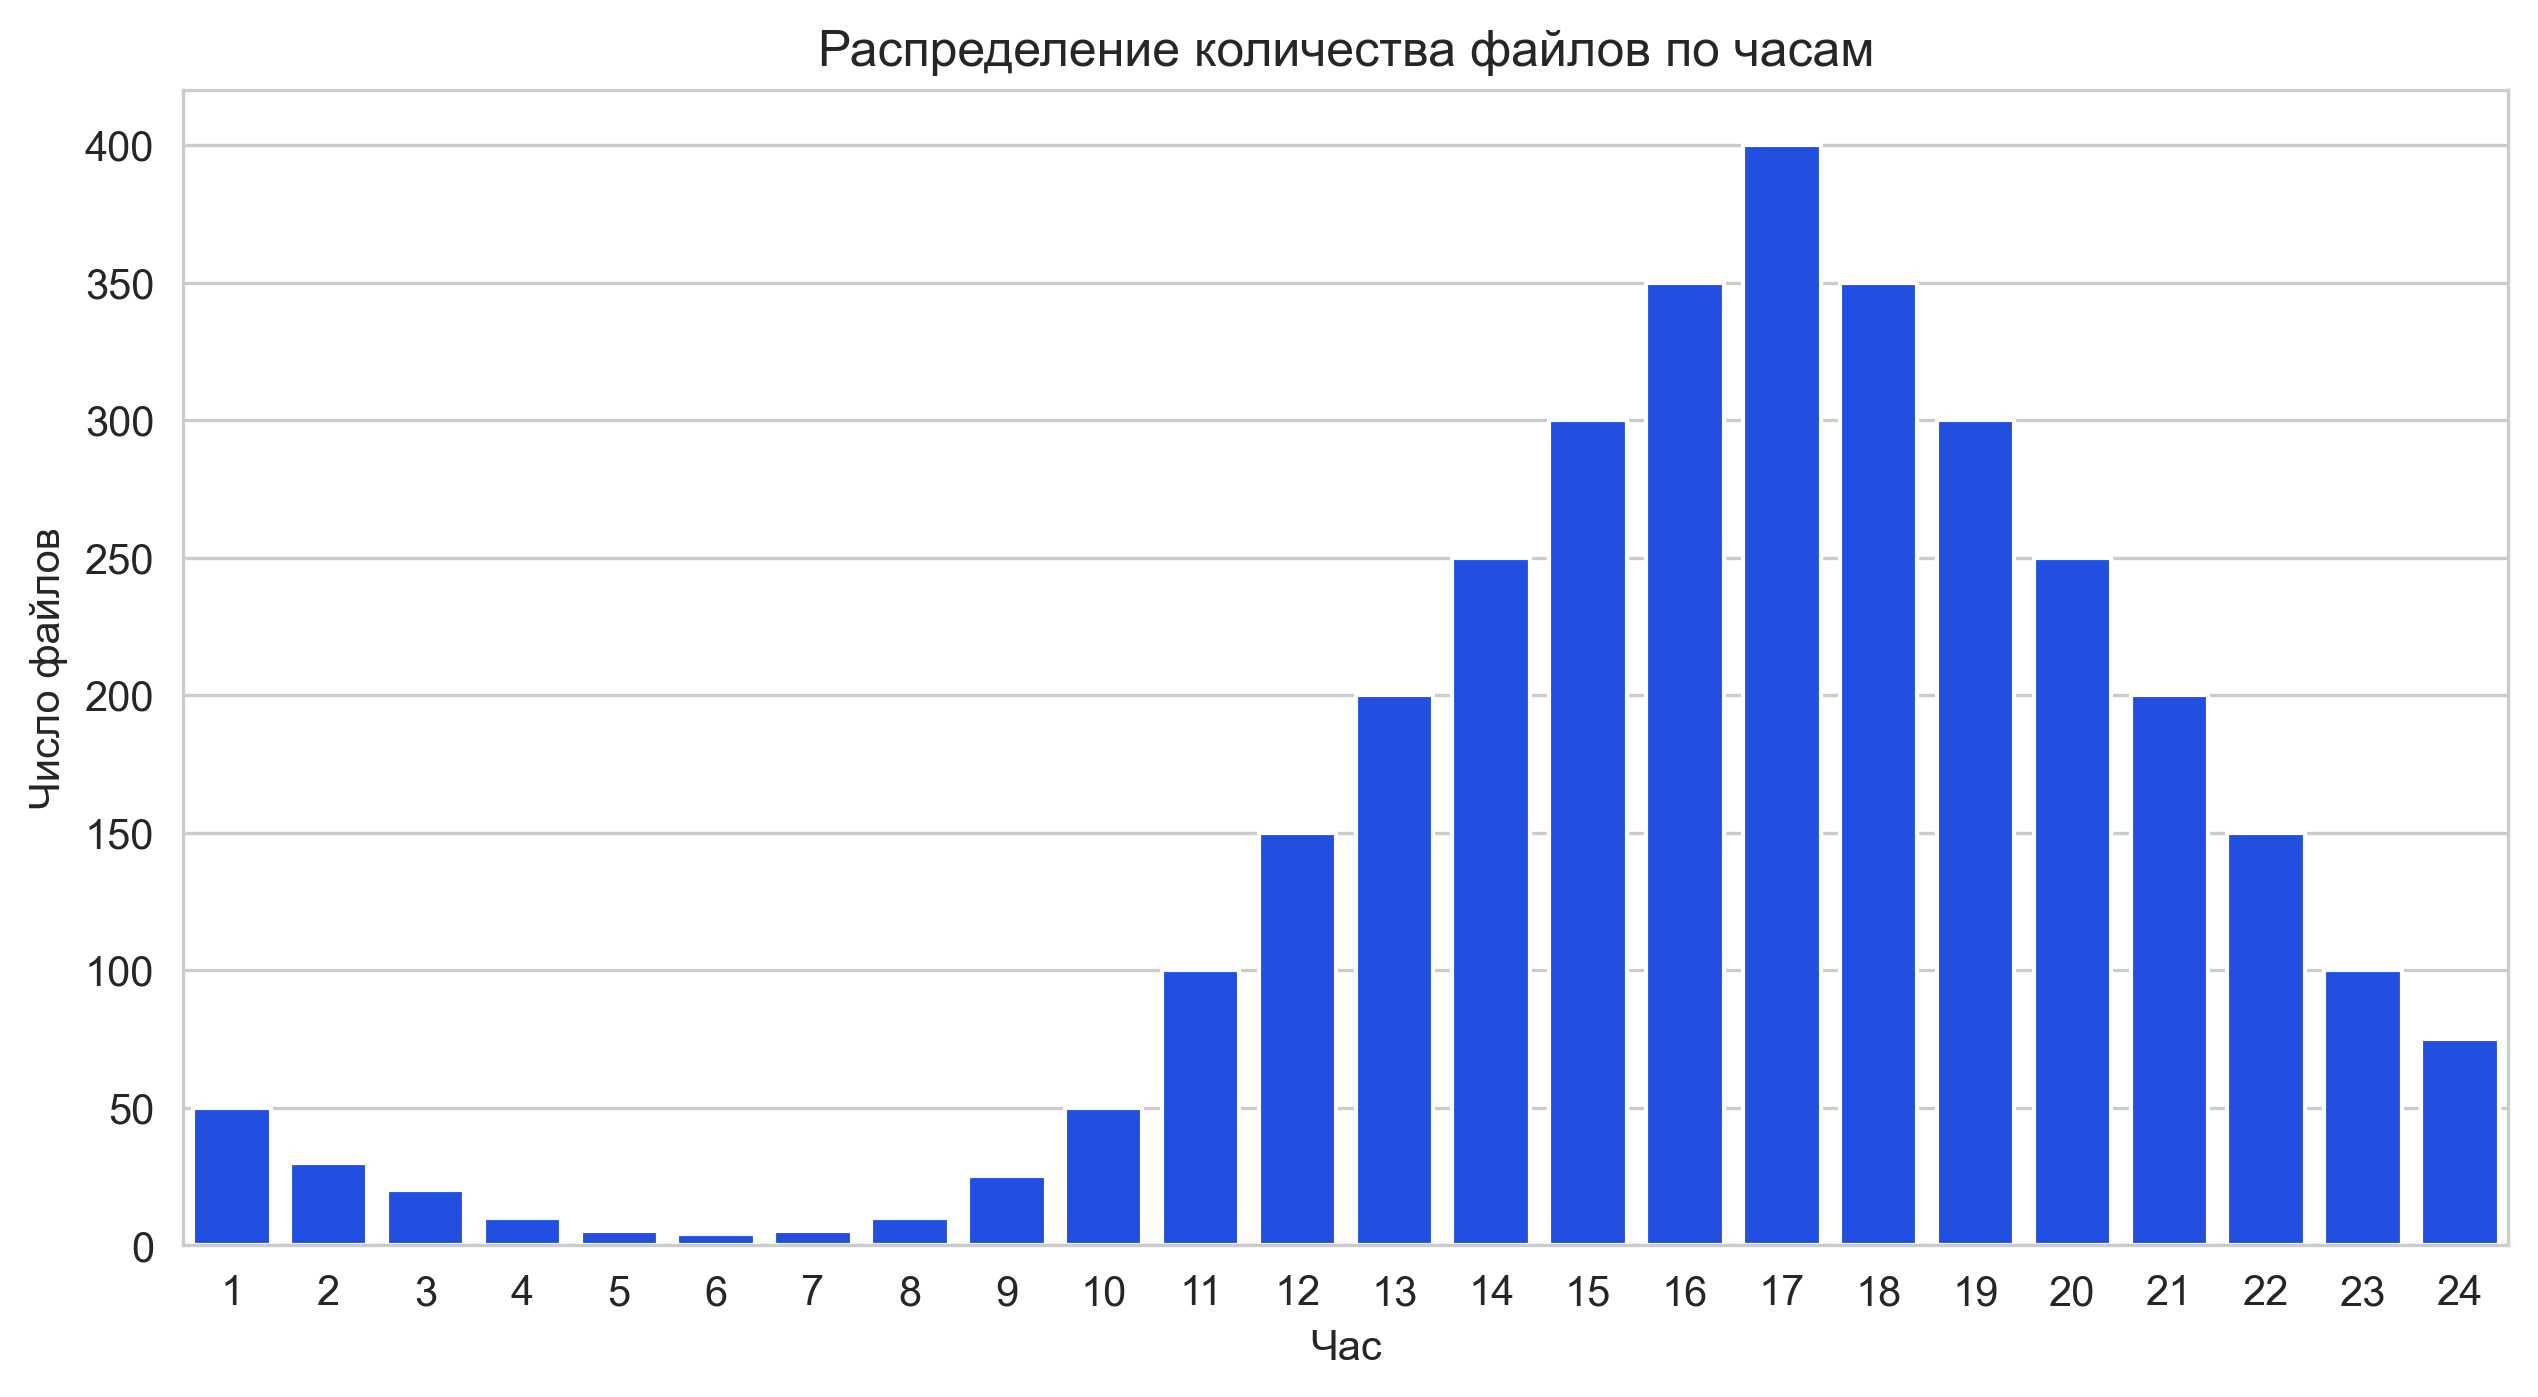

In [10]:
fig = plt.figure(figsize= (10, 5), dpi= 300)

data = {'hour': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
        'file_count': [50, 30, 20, 10, 5, 4, 5, 10, 25, 50, 100, 150, 200, 250, 300, 350, 400, 350, 300, 250, 200, 150, 100, 75]}
df = pd.DataFrame(data)

# Создание гистограммы
sns.set_style("whitegrid")
ax = sns.barplot(x="hour", y="file_count", data=df)
ax.set_xlabel("Час")
ax.set_ylabel("Число файлов")
ax.set_title("Распределение количества файлов по часам")

### Задание 2.1 (дополнительное для отличников)
На основании построенных гистограмм какие выводы можно сделать?

## Задание №3
Постройте 2 гистограммы:
- Распределения количества файлов в зависимости от раздела.
- Постройте ящики с усами для среднего количества файлов в проекте в зависимости от раздела.

In [11]:

df_2['Type'] = df['TypeDocs'].str[0]
df_2


KeyError: 'TypeDocs'

In [12]:
files_by_section = df_2['Type'].count()

sns.countplot(x= df_2['Type'], hue= df_2['FileSize'], data= df)
# задаем название графика и осей
plt.title('Distribution of files by section')
plt.xlabel('Type of document')
plt.ylabel('Number of files')

# отображаем график
plt.show()

KeyError: 'Type'

In [13]:
# строим ящики с усами
plt.boxplot(df.groupby('TypeDocs')['FileType'].count())

# задаем название графика и осей
plt.title('Boxplot of files by section')
plt.ylabel('Number of files')

# задаем метки для оси X
sections = files_by_section.index
plt.xticks(range(1, len(sections) + 1), sections, rotation=90)

# отображаем график
plt.show()


KeyError: 'TypeDocs'

### Задание 3.1 (дополнительное для отличников)
Какие рекомендации можно дать по создания/удалению разделов?

## Задание №4
Постройте гистограмму суммарного объёма файлов по проектам (используйте логарифмическую шкалу для объёма).

## Задание №5
Постройте ящики с усами для размеров загружаемых файлов по компаниям.

### Задание 5.1 (дополнительное для отличников)
Можно ли сделать какие-то выводы о предпочтениях к большим/маленьким файлам в разных компаниях? Можно ли сделать практически полезные выводы для администраторов сервиса загрузки?

## Задание №6
Какие ещё графики вы построили для этих данных и какой вывод из этой иллюстрации можно сделать? Постройте ещё хотя бы 1 любой график/гистограмму/боксплот или иную иллюстрацию.